In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import requests
import requests_cache
import io
import scipy
import math
%matplotlib inline

In [2]:
requests_cache.install_cache('github', expire_after=3600)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data = requests.get(url).content
df = pd.read_csv(io.BytesIO(data))
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,484,521,555,607,665,714,784,840,906,933
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,409,416,433,446,467,475,494,518,539,548
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,583,601,601,638,646,659,673,673,696,704
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,24


In [3]:
germany = df.loc[df['Country/Region']=='Germany',df.columns[4:]].transpose()

In [4]:
subset = germany[germany[germany.columns[0]]>0]
subset.columns = ['Infected']
subset.index = pd.to_datetime(subset.index)
subset.head()

,Infected
2020-01-27,1
2020-01-28,4
2020-01-29,4
2020-01-30,4
2020-01-31,5


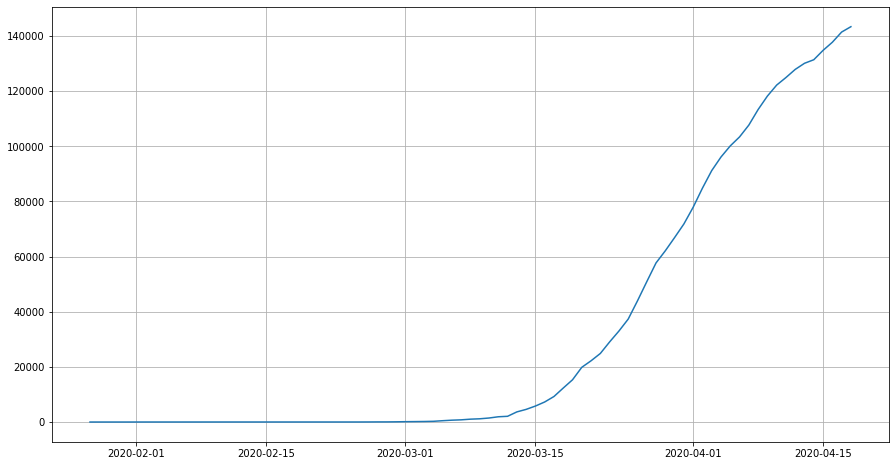

In [5]:
plt.figure(figsize=(15,8))
plt.yscale('linear')
plt.grid()
plt.plot(subset.index, subset[subset.columns[0]]);

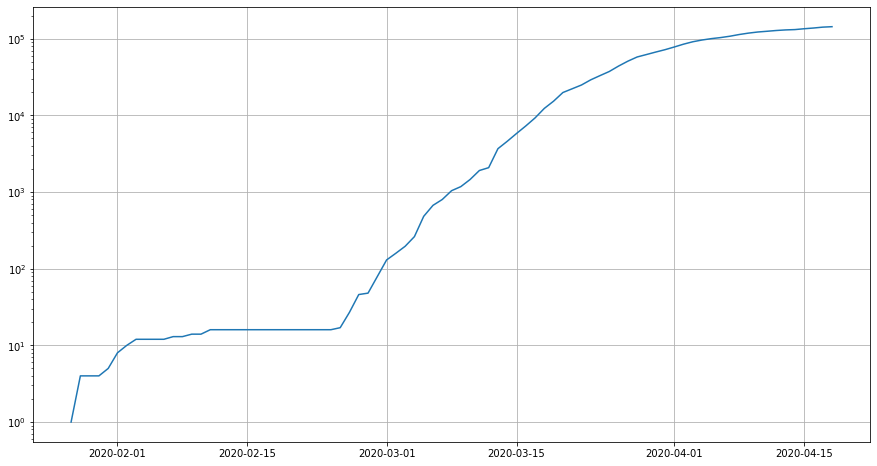

In [6]:
plt.figure(figsize=(15,8))
plt.yscale('log')
plt.grid()
plt.plot(subset.index, subset[subset.columns[0]]);

Exponential phase started at 2020-02-25
Dublicating the number of cases every 4.00 days


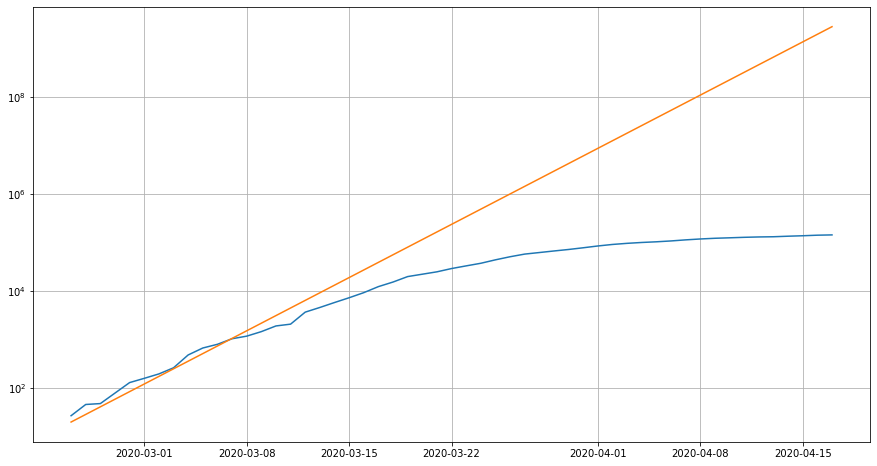

In [7]:
t0 = datetime.datetime(2020, 1, 1)
t = np.array([(datetime.datetime.combine(x, datetime.datetime.min.time()) - t0).total_seconds() / 24 / 3600 for x in subset.index.date])
y = np.array([x[0] for x in subset.values])
y_magic = 20
start = np.where(y >= y_magic)[0][0]
t = t[start:]
y = y[start:]
plt.figure(figsize=(15,8))
plt.grid()
plt.yscale('log')
delta_t = 4 
y_fit = y_magic * np.exp((t - t[0]) / (delta_t * math.log(2)))
d = [t0 + datetime.timedelta(x - 1) for x in t]
plt.plot(d, y, d, y_fit)
print('Exponential phase started at %s' % (t0 + datetime.timedelta(t[0] - 1)).date())
print('Dublicating the number of cases every %.2f days' % delta_t)